Historical crypto price data:

In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot

Shorter timeframes:

In [5]:
# valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo] (60 day limit)
data_ = yf.download("ETH-USD", start='2022-12-01', end='2023-01-15',  interval = "90m")

[*********************100%***********************]  1 of 1 completed


In [7]:
# drop columns
data = data_.drop(['Open', 'High', "Low", 'Volume', 'Close'], axis=1)
data.head()

,Adj Close
Datetime,
2022-12-01 00:00:00+00:00,1286.708008
2022-12-01 01:30:00+00:00,1286.933594
2022-12-01 03:00:00+00:00,1287.777344
2022-12-01 04:30:00+00:00,1282.241943
2022-12-01 06:00:00+00:00,1282.618652


<AxesSubplot:xlabel='Datetime'>

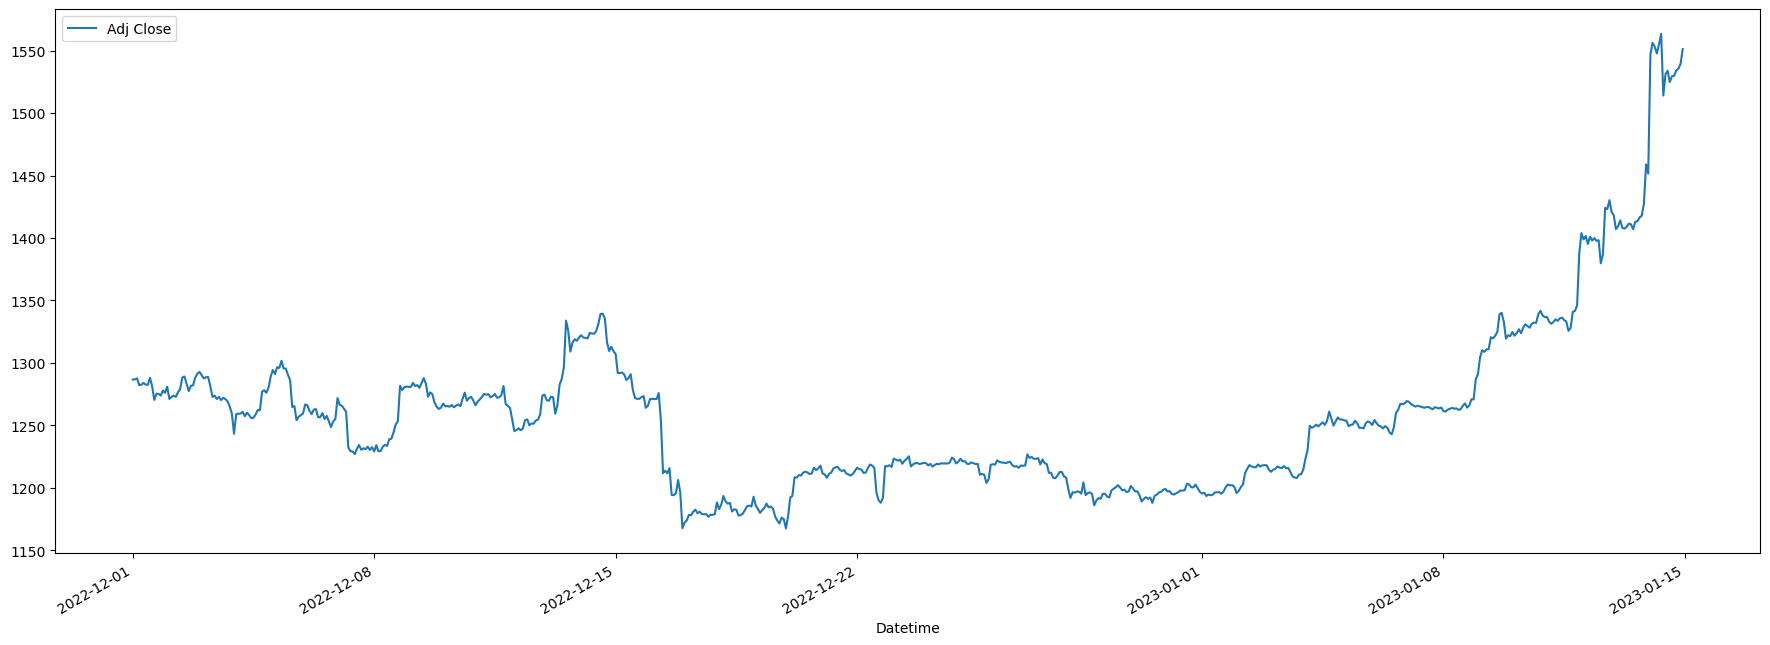

In [8]:
data.plot(figsize=(22,8))

Daily close:

In [10]:
# set ticker ('BTC-USD', 'ETH-USD')
ticker = 'BTC-USD'
cc = yf.Ticker(f"{ticker}")

In [11]:
# set dates for historical data
start = '2018-02-01'
end = '2023-01-18'

hist = cc.history(start=f"{start}", end=f"{end}")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,0.0,0.0
2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,0.0,0.0
2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,0.0,0.0
2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,0.0,0.0
2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,0.0,0.0


In [12]:
historical = pd.DataFrame(hist)
historical = historical.drop(['Open', 'High', "Low", 'Volume', 'Dividends', 'Stock Splits'], axis=1)
historical.head()

,Close
Date,
2018-02-01 00:00:00+00:00,9170.540039
2018-02-02 00:00:00+00:00,8830.750000
2018-02-03 00:00:00+00:00,9174.910156
2018-02-04 00:00:00+00:00,8277.009766
2018-02-05 00:00:00+00:00,6955.270020


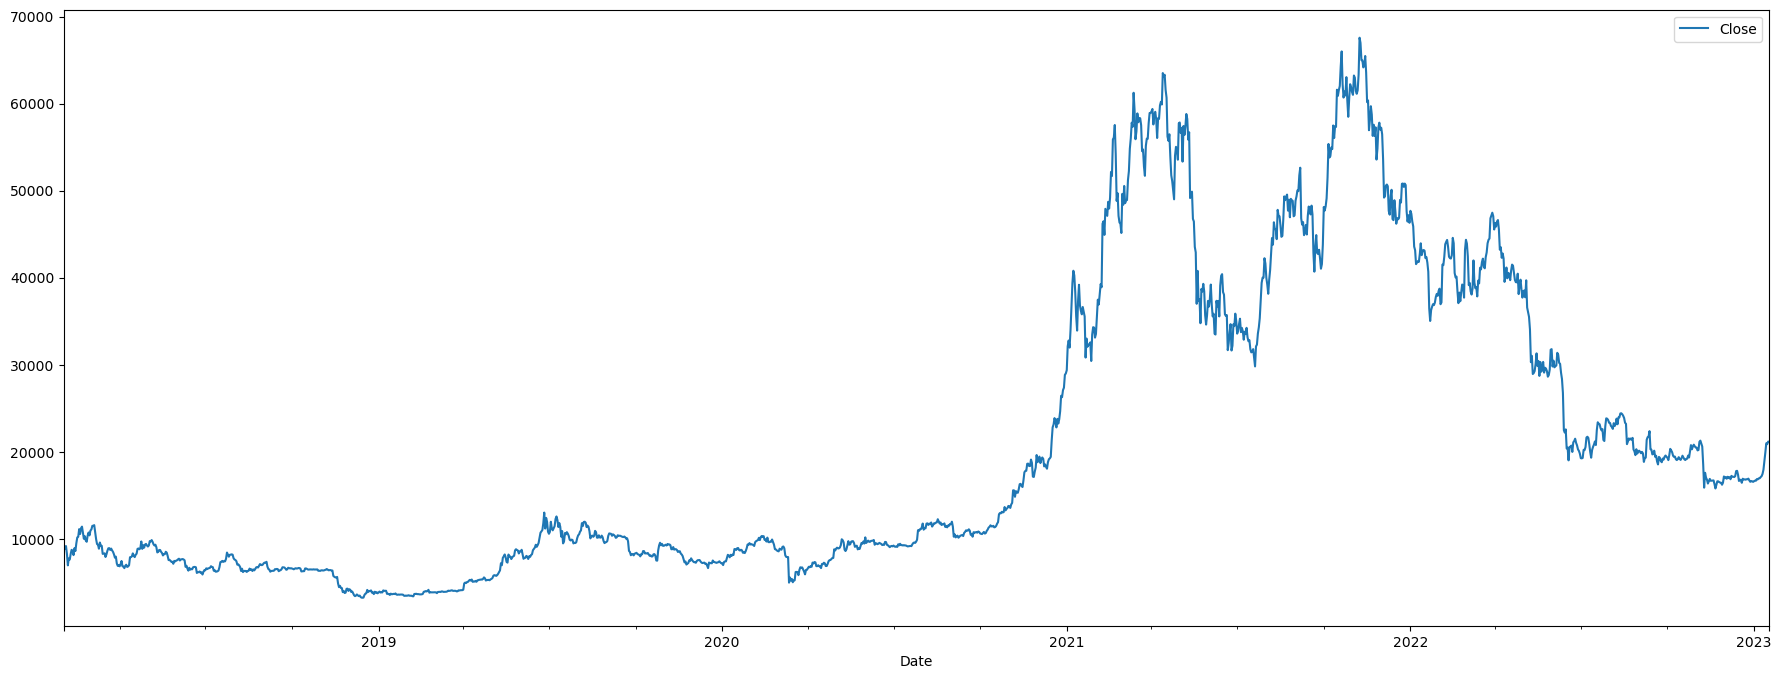

In [13]:
hist_plot = historical.plot(figsize=(22,8))

Fear and Greed:

In [14]:
import requests

In [15]:
r = requests.get('https://api.alternative.me/fng/?limit=0')

In [16]:
# select 'data' and add to a dataframe
fg_df = pd.DataFrame(r.json()['data'])

In [17]:
# convert 'value' to int
fg_df.value = fg_df.value.astype(int)

# convert time format to datetime
fg_df.timestamp = pd.to_datetime(fg_df.timestamp, unit='s' )

# set date as index
fg_df.set_index('timestamp', inplace=True)

In [18]:
# drop all columns except 'value'
fg_df = fg_df.drop(['value_classification', 'time_until_update'], axis=1)

In [19]:
# flip oldest data to the top
fg_df = fg_df[::-1]

In [20]:
# convert date format to match 'historical'
fg_df.index = pd.to_datetime(fg_df.index).tz_localize('Etc/UCT')

In [21]:
display(fg_df.head())
display(fg_df.tail())

,value
timestamp,
2018-02-01 00:00:00+00:00,30
2018-02-02 00:00:00+00:00,15
2018-02-03 00:00:00+00:00,40
2018-02-04 00:00:00+00:00,24
2018-02-05 00:00:00+00:00,11


,value
timestamp,
2023-01-14 00:00:00+00:00,46
2023-01-15 00:00:00+00:00,52
2023-01-16 00:00:00+00:00,45
2023-01-17 00:00:00+00:00,51
2023-01-18 00:00:00+00:00,52


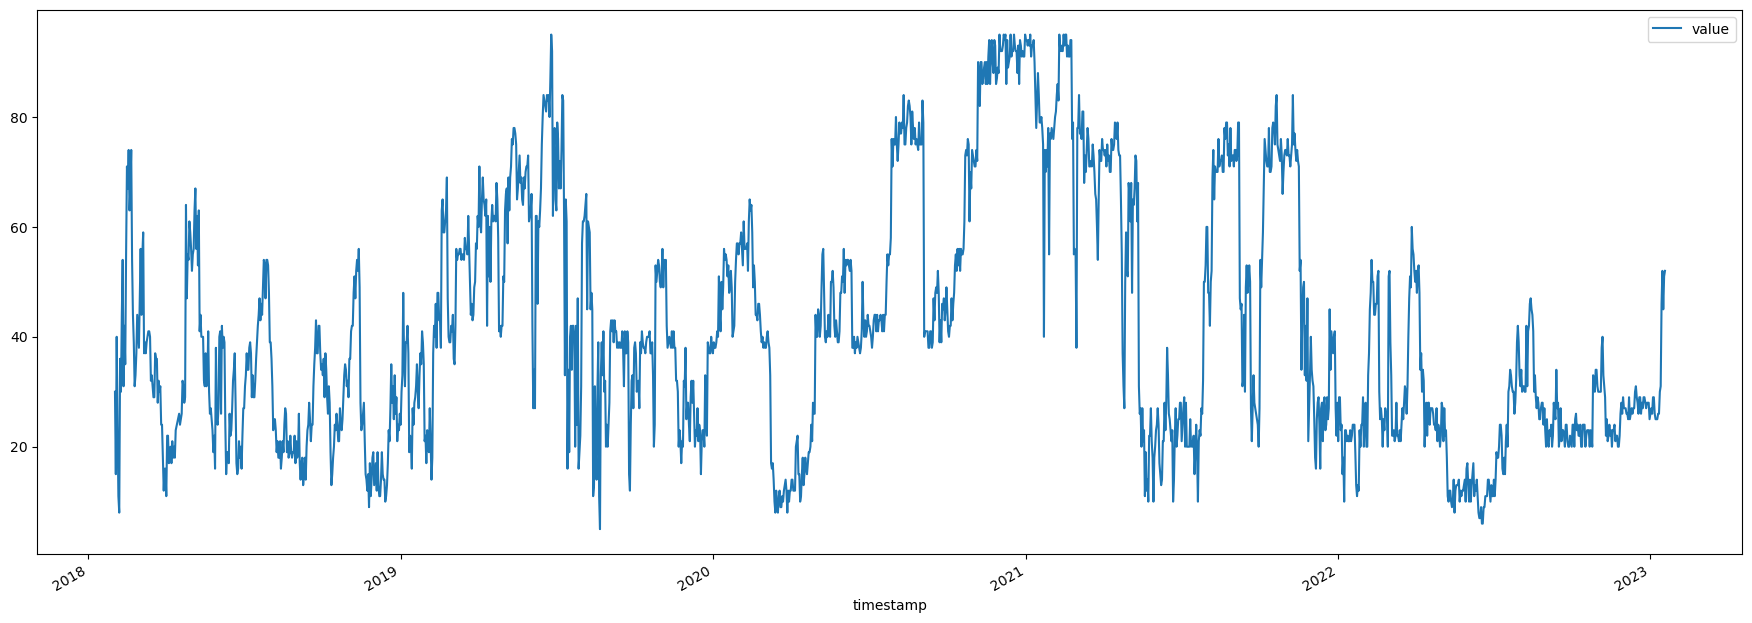

In [38]:
fg_plot = fg_df.plot(figsize=(22,8))

Combined dataframes:

In [23]:
# rename index to match fg_df
historical.index.name = 'timestamp'

# combine historical price data with historical fear and greed
combined_df = pd.concat([fg_df, historical], axis=1,join='outer')

In [24]:
display(combined_df.head())
display(combined_df.tail())

,value,Close
timestamp,,
2018-02-01 00:00:00+00:00,30.0,9170.540039
2018-02-02 00:00:00+00:00,15.0,8830.750000
2018-02-03 00:00:00+00:00,40.0,9174.910156
2018-02-04 00:00:00+00:00,24.0,8277.009766
2018-02-05 00:00:00+00:00,11.0,6955.270020


,value,Close
timestamp,,
2023-01-14 00:00:00+00:00,46.0,20976.298828
2023-01-15 00:00:00+00:00,52.0,20880.798828
2023-01-16 00:00:00+00:00,45.0,21169.632812
2023-01-17 00:00:00+00:00,51.0,21161.519531
2023-01-18 00:00:00+00:00,52.0,NaN


Overlayed plots:

In [26]:
import matplotlib.pyplot as plt

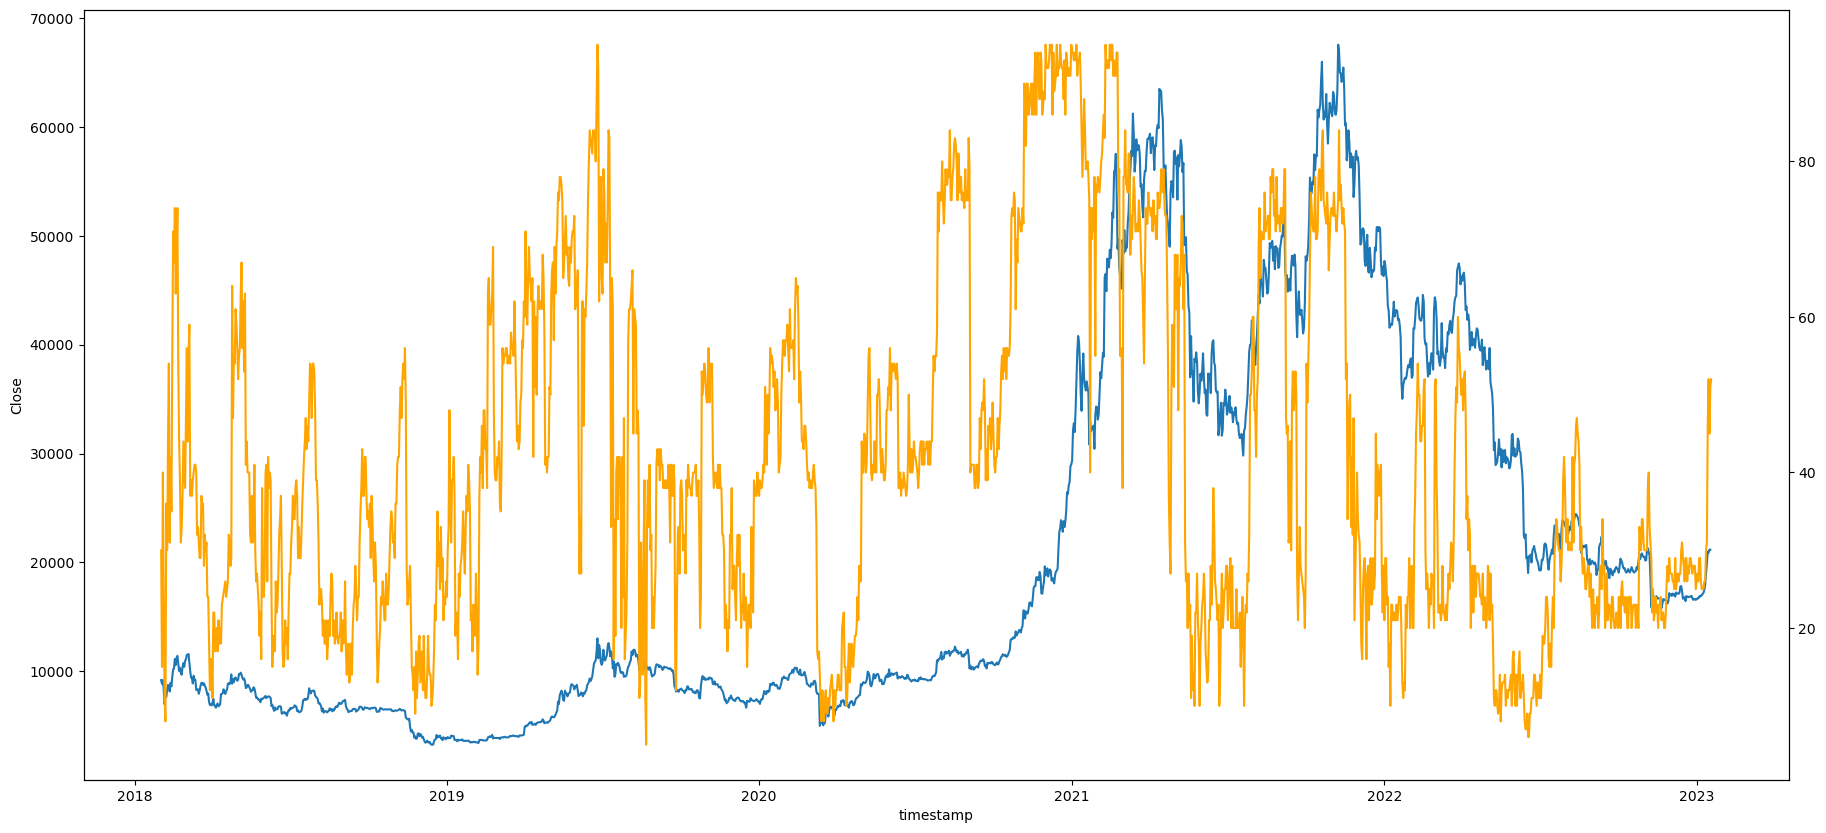

[]

In [40]:
# adding second y axis to compare
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(22,10))

# make a plot
ax.plot(historical)

# set x-axis label
ax.set_xlabel('timestamp')

# set y-axis label
ax.set_ylabel("Close")

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(fg_df.value, color='orange')
plt.show()

ax2.plot()